In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

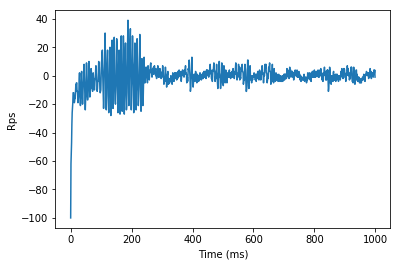

In [29]:
df = pd.read_csv('data/leftMotorRps_SamplingRate1ms_Target100rps')
#print (df)

time = df['Time']
#print (time)
period = df['Period'] # measured in microseconds
period = period
#print (period)
        
# rotations per second
rps = [1000000/periodVal if periodVal != 0 else 0 for periodVal in period]
rps = np.array(rps)
rps = rps - 100
#print (rps)

#plt.figure (figsize = (30,20))
plt.plot (time, rps)
plt.ylabel ('Rps')
plt.xlabel ('Time (ms)')
plt.show () 

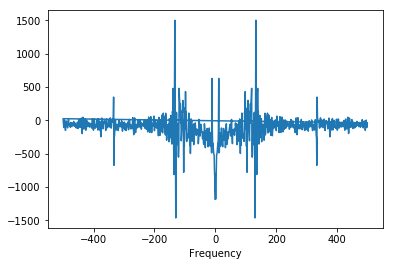

In [30]:

rpsForFFT = rps - 100
rpsFFT = np.fft.fft (rps)
#print (rpsFFT)
freq = np.fft.fftfreq (len(rps), d = .001) # d is sampling period = 1 ms
#print (freq)

#plt.figure (figsize = (30,20))
#plt.ylim (0,1)
plt.plot (freq, rpsFFT.real)
plt.xlabel ('Frequency')
plt.show ()

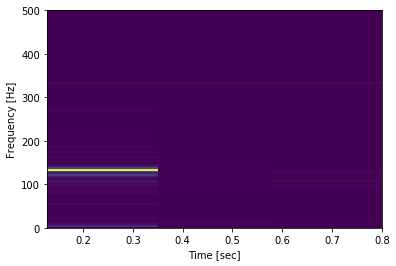

In [31]:
f, t, Sxx = signal.spectrogram(x = rps, fs=1000)
#plt.figure (figsize = (30,20))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


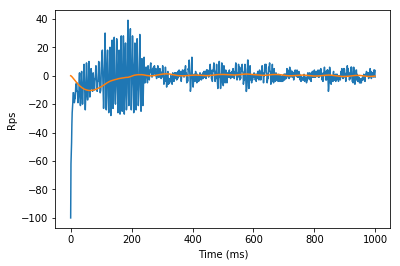

In [14]:
sos = signal.butter(N = 2, Wn = .01, btype='low', analog=False, output = 'sos') # Cut-off/Crit Freq (Wn) is 5 Hz
#print (a) # numerator
#print (b) # denominator
#print (sos)
rpsLPF = signal.sosfilt(sos, rps)
#plt.figure (figsize = (30,20))
plt.plot (time, rps, time, rpsLPF)
plt.ylabel ('Rps')
plt.xlabel ('Time (ms)')
plt.show () 